<a href="https://colab.research.google.com/github/pattyish/Broadcaster/blob/master/pishimwe_Patrick_Ishimwe_DAIMLAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question 1

In [ ]:
import math
def calculateNumFolds(distNum):
  x = distNum * math.pow(10, 3) ## converting to 8 848m in mm 
  totalNumFolds = math.ceil(math.log(x) / math.log(2))
  print(totalNumFolds)

# Get the number of folds based on the number you to the function
calculateNumFolds(8848)

23.076919954896795


#Question 2

In [ ]:
import math
# t = ln 1 - ln 2 / (-0.1)
# ln in math function of python is log
t = round(math.log(1) - math.log(2) / (-0.1))

# print time after get it
print(str(t) + "unit of time")

7unit of time


#Question 3

In [1]:
import math
initialAmount = 100 # In dollar
rate = 5/100 # My interest Rate 
amountWithInterest = 0
for i in [1, 2, 3, 4, 5]:
  # Bellow line will going to print the compound interest by using p * (1 + rate)^n 
  # where p is initial amount, rate is the interest rate and n is the time. this will be calculated annually.
  print("year " + str(i) + ": $" +str(round(initialAmount * (math.pow((1 + rate),i)))))


year 1: $105
year 2: $110
year 3: $116
year 4: $122
year 5: $128


#Question 4

In [2]:
loan = 20000 # in dollar
rate = 1/100      # interest rate of monthly

# formula to used on payment= r(pv)/(1-(1+r)^-n
# resuable function to create debt to pay off
def calculatePayOffDebt(loan, rate):
  monthsOfYear = 12 # Is eqaul to one year
  for i in [1, 2, 3]:
    payment = (loan * rate) / (1 - (1 + rate)**(-i * 12))
    print("The monthly pay off for in " + str(i) + " is " + "$"+str(round(payment)))

# calling function with loan and rate 
# loan and rate should be change the way you want but here value is $20000 for loan and 1/100 for rate 
calculatePayOffDebt(loan, rate)    


The monthly pay off for in 1 is $1777
The monthly pay off for in 2 is $941
The monthly pay off for in 3 is $664


#Question 5

the number of days it will take to reach $100000 are: 70


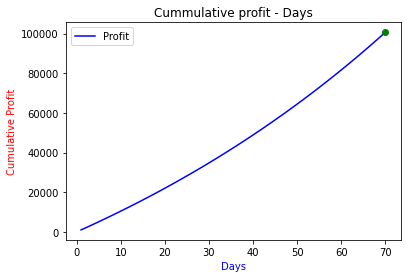

In [9]:
import matplotlib.pyplot as plt

# Customers on the first day
customers = 100 
# start day where i have 100 customers
day = 1  
# This is in dollar
profitForOneCustomer = 10 

# Initial Investment
totalInvestment = 100000

# first day Profit
cumulativeProfit = (customers * profitForOneCustomer) 

# Lists to keep store my Day to day profita and days as well.
dayTodayProfit = [cumulativeProfit]
days = [day]
  
##print(str(customers) + " " + str(cumulativeProfit) + " " + str(day))
while (True):
  if cumulativeProfit >= totalInvestment:
    break
  customers = customers * 1.01
  cumulativeProfit = (customers * profitForOneCustomer) + cumulativeProfit
  day = day + 1
  dayTodayProfit.append(cumulativeProfit)
  days.append(day)

# plotting days and cummulative profit to graph    
plt.plot(days, dayTodayProfit, color = "blue", label = "Profit")
plt.xlabel("Days", color="blue")
plt.ylabel("Cumulative Profit", color="red")
plt.plot(days[-1], dayTodayProfit[-1], 'go')

# Printing the last day is days list which is the last day
print("the number of days it will take to reach $100000 are: " + str(days[-1]))
plt.title("Cummulative profit - Days")
plt.legend()
plt.show()

#Question 6

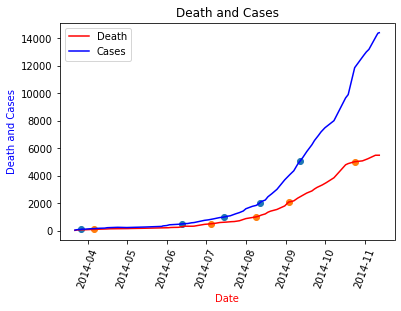

In [108]:
deathDateList = []
casesDateList = []
deathList = []
casesList = [] 
list1 = list(df["Death"])
list2 = list(df["Cases"])
# Extracting data from excel sheet
df = pd.read_excel("ebola_download.xls")

# Reindex dataset to date 
index = pd.date_range(min(df.Date), max(df.Date))
df = df.set_index("Date").reindex(index)

# using interpolation to fill missing value
df = df.interpolate(method='linear')

# Looping througth to dataset 
for value in [100, 500, 1000, 2000, 5000]:
  dateIndexForDeath = min(df.index[df["Death"] >= value])
  dateIndexForCase = min(df.index[df["Cases"] >= value])
  deathDateList.append(datetime.strptime(dateIndexForDeath.strftime('%m/%d/%y'), '%m/%d/%y'))
  casesDateList.append(datetime.strptime(dateIndexForCase.strftime('%m/%d/%y'), '%m/%d/%y'))
  deathList.append(df["Death"].loc[min(df.index[df["Death"] >= value])])
  casesList.append(df["Cases"].loc[min(df.index[df["Cases"] >= value])])

# plt.figure(figsize=(10,5))
plt.plot(df.index[:], list1, label="Death", color="red")
plt.plot(df.index[:], list2, label="Cases", color="blue")
plt.scatter(casesDateList, casesList, marker="o")
plt.scatter(deathDateList, deathList, marker="o")
plt.xticks(rotation=70)
plt.legend()
plt.title("Death and Cases");
plt.ylabel("Death and Cases", color="blue")
plt.xlabel("Date", color="red")
plt.show()
# plt.legend()
# plt.show()

#Question 7

In [68]:
# using interpolated data from question six
deathSet = df["Death"]
casesSet = df["Cases"]

sumDeath = 0
sumCases = 0

# function to calculate daily growth that will take two value day and previous day
def calculateGrowth(currentDeath, previousDeath):
  return ((currentDeath - previousDeath) / previousDeath) * 100 

# This loop will loop througth the dataset and calculate sum of daily growth rate for deaths
for i in range(len(deathSet) - 1): 
  sumDeath = sumDeath + calculateGrowth(deathSet[i + 1], deathSet[i])
 
# This loop will loop througth the dataset and calculate sum of daily growth rate for cases
for i in range(len(casesSet) - 1):
  sumCases = sumCases + calculateGrowth(casesSet[i + 1], casesSet[i])

print(sumDeath/(len(deathSet) - 1))
print(sumCases/(len(casesSet) - 1))


2.330608083367968
2.5065218916499963


#Question 8

In [8]:
ratioList = list(deathSet/casesSet)
print("average ration " + str(sum(ratioList) / len(ratioList)))

plt.plot(deathSet, casesSet, label="Death vs Case")
plt.legend()
plt.title("Death - Cases");
plt.xlabel("Death", color="blue")
plt.ylabel("Cases", color="red")
plt.show()


NameError: ignored

#Question 9

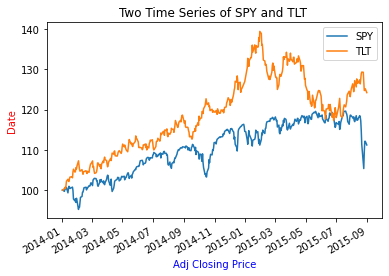

In [86]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime 

spy = pd.read_csv("SPY.csv")
tlt = pd.read_csv("TLT.csv")
spy = spy[(spy["Date"]>= "2014-01-01") & (spy["Date"]<= "2015-08-31")]
tlt = tlt[(tlt["Date"]>= "2014-01-01") & (tlt["Date"]<= "2015-08-31")]

def normaliseAdjClose(extrDataSet):
    first=list(extrDataSet['Adj Close'])[0]
    result=[]
    for i in range(len(list(extrDataSet['Adj Close']))):
        result.append((list(extrDataSet['Adj Close'])[i]/first)*100)
    return result


def extractDate(extrDataSet):
  date = pd.to_datetime(extrDataSet["Date"])
  return date
 
spyListDate = extractDate(spy)
tltListDate = extractDate(tlt)
normalisedAdjSpy = normaliseAdjClose(spy)
normalisedAdjTlt = normaliseAdjClose(tlt)

plt.plot(spyListDate, normalisedAdjSpy, label="SPY")
plt.plot(tltListDate, normalisedAdjTlt, label="TLT")
plt.title("Two Time Series of SPY and TLT ");
plt.xlabel("Adj Closing Price", color="blue")
plt.ylabel("Date", color="red")
plt.legend()
plt.gcf().autofmt_xdate()


# Question 10 

In [103]:
listTlt = []
listSpy = []
def createDatatList(dataSet, listDataSet):
  for i in dataSet:
    listDataSet.append(i)

def dataSetAverage(listDataSet):
  sum = 0
  dailyReturnList = []
  for i in range(len(listDataSet)):
    if i == 0:
      continue
    dailyReturn = (listDataSet[i]/ listDataSet[i-1] - 1) #r(t) = p(t)/p(t-1)-1
    dailyReturnList.append(dailyReturn)
    sum = sum + dailyReturn
    # print(sum)
  return [sum,dailyReturnList]


createDatatList(spy["Adj Close"], listSpy)
createDatatList(tlt["Adj Close"], listTlt)
print("Average of daily return for SPY " + str(dataSetAverage(listSpy)[0]/len(listSpy) * 100))
print("Average of daily return for TLT " + str(dataSetAverage(listTlt)[0]/len(listTlt) * 100))

print("Minimun of daily return for SPY " + str(min(dataSetAverage(listSpy)[1]) * 100))
print("Minimun of daily return for SPY " + str(min(dataSetAverage(listTlt)[1]) * 100))
print("Maximun of daily return for SPY " + str(max(dataSetAverage(listSpy)[1]) * 100))
print("Maximun of daily return for SPY " + str(max(dataSetAverage(listTlt)[1]) * 100))


Average of daily return for SPY 0.028543979507712453
Average of daily return for TLT 0.055246329412850737
Minimun of daily return for SPY -4.2106781665589015
Minimun of daily return for SPY -2.4324722414521993
Maximun of daily return for SPY 3.839371960231941
Maximun of daily return for SPY 2.6468916582609303
